# Algorithmic Trading Coursework


In [599]:
#Preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
import math
import statsmodels.api as sm
import statsmodels
from statsmodels.tsa.stattools import adfuller
from numpy.random import default_rng
from numpy.random import seed
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.graphics.tsaplots as sgt
from pmdarima.arima import auto_arima
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## Time series Generation and Analysis
1. Initialise the random number generator of your chosen programming package using a
seed equal to your student number. <br>
2. Generate a price time series using the equation <br>
∆yt −d = φ(∆yt−1 −d) +$ε_t$ +θ $ε_{t−1}$ <br>
where t ranges 0 to 2000, y0 = y1 = 100, φ = 0.6, d = 0.025, θ = −0.4. ε(t) is a sequence
of i.i.d Gaussian random variables with zero mean and unit variance. Divide the time
series into a training set and a test set, representing 70% and 30% of the data, respectively.

### Generating

In [600]:
# 1.Initialise the random number generator of your chosen programming package using a seed equal 
#   to your student number.

# Paramethers' Input
seed(20057398)                   # seeding
rng= default_rng
wn = np.random.normal(0,1, 2000) # generating the white noise
y0 = 100
y1 = 100
t  = np.arange(2000)
T  = 2000
phi= 0.6
d  = 0.025
theta = -0.4

the array of d_y is  [ 0.         -1.21515776 -0.89112638 ... -1.53067908  0.75777432
  0.        ] 



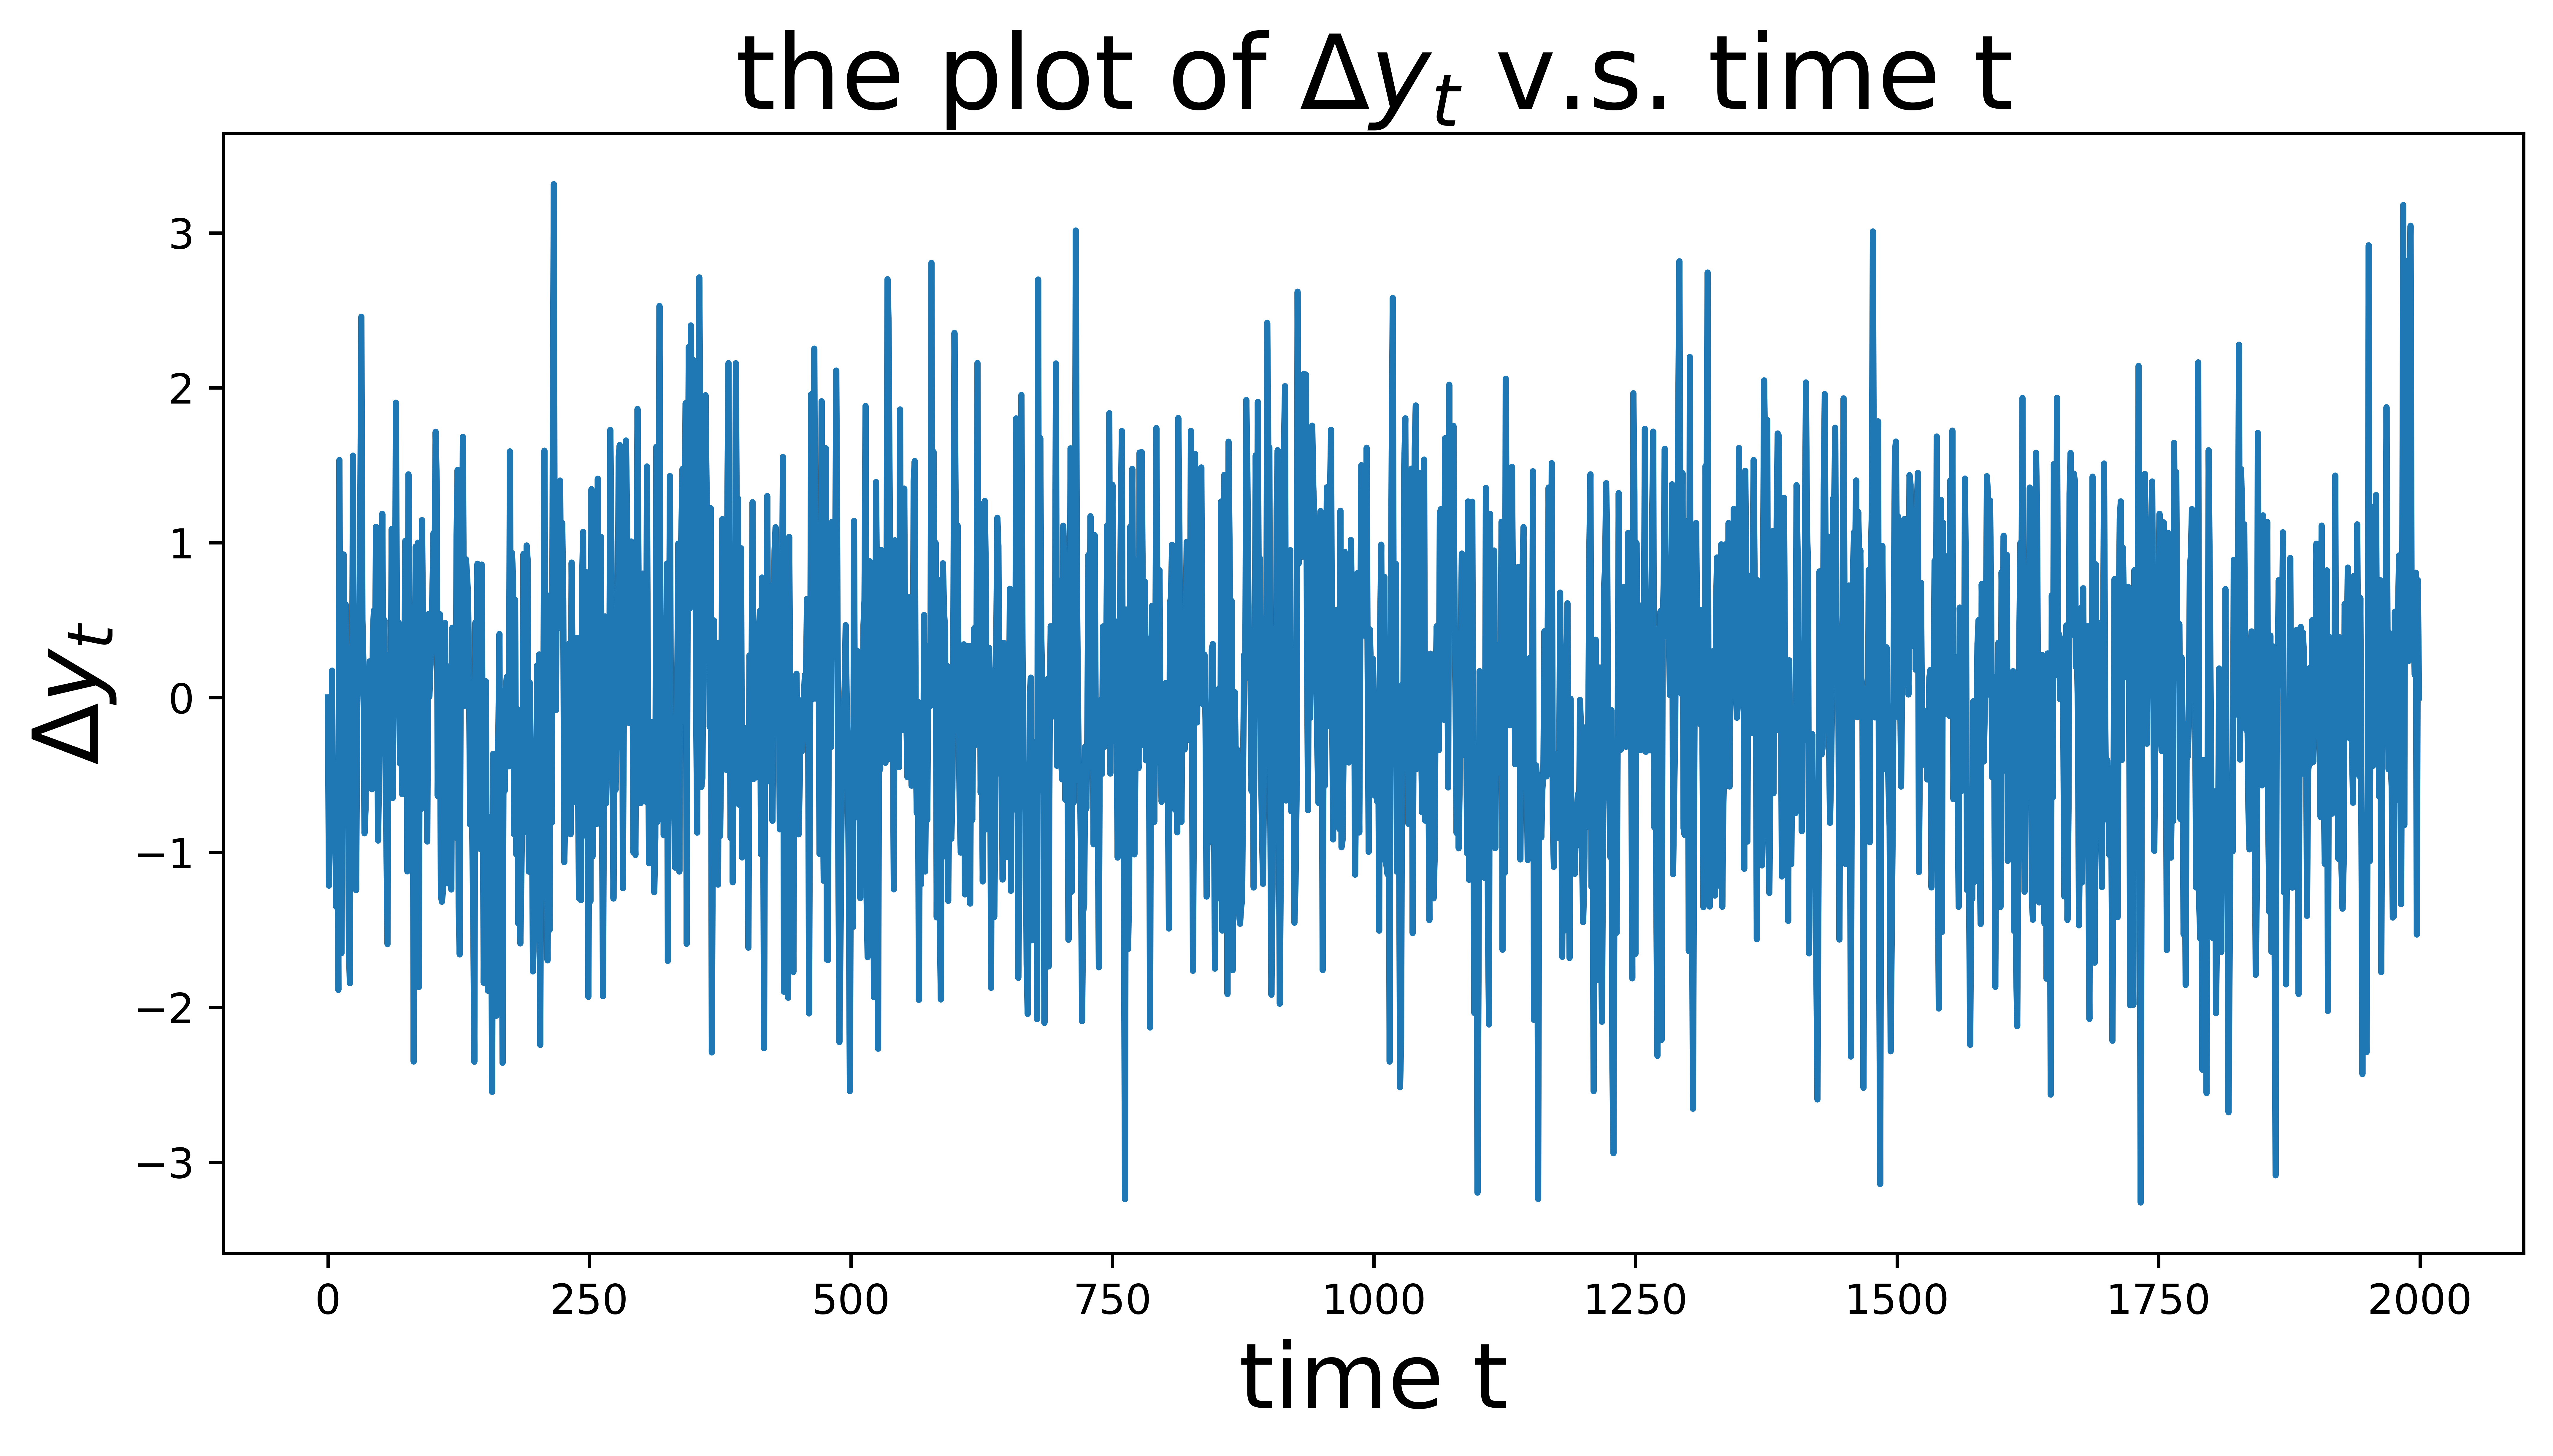

In [601]:
# d_y generating
d_y = np.zeros(2000)                
d_y[0] = y1 - y0
for i in range(1,1999):
    d_y[i] = phi* (d_y[i-1] - d) + wn[i] + theta * wn[i-1] +d
print('the array of d_y is ', d_y, "\n")
# plot of d_y
plt.figure(figsize = [10,5],dpi=1000,facecolor='w', edgecolor='k')
plt.plot(d_y)
plt.title('the plot of $\Delta y_{t}$ v.s. time t', size = 25)
plt.xlabel('time t', size= 22)
plt.ylabel('$\Delta y_{t}$', size = 22)
plt.savefig('1.png')

<Figure size 10000x5000 with 0 Axes>

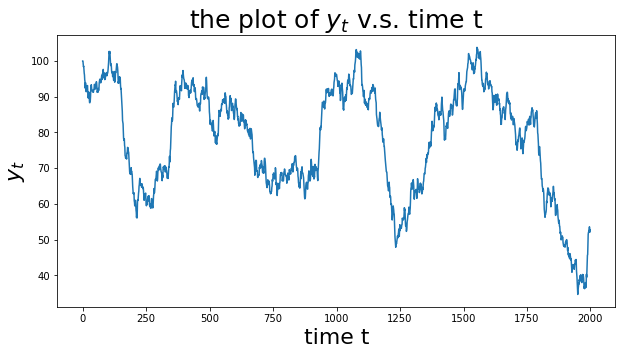

In [602]:
# Putting d_y back into y
y = np.zeros(2000)
y[0:2] = 100
for i in range(2,1999):
    y[i] = y[i-1] + d_y[i]

# plot of y
plt.figure(figsize = [10,5],dpi=1000,facecolor='w', edgecolor='k')
plt.figure(figsize = [10,5])
plt.plot(y[:-1])
plt.title('the plot of $y_{t}$ v.s. time t', size = 25)
plt.xlabel('time t', size= 22)
plt.ylabel('$y_{t}$', size = 22)
plt.savefig('1.png')

Text(0, 0.5, '$y_{t}$')

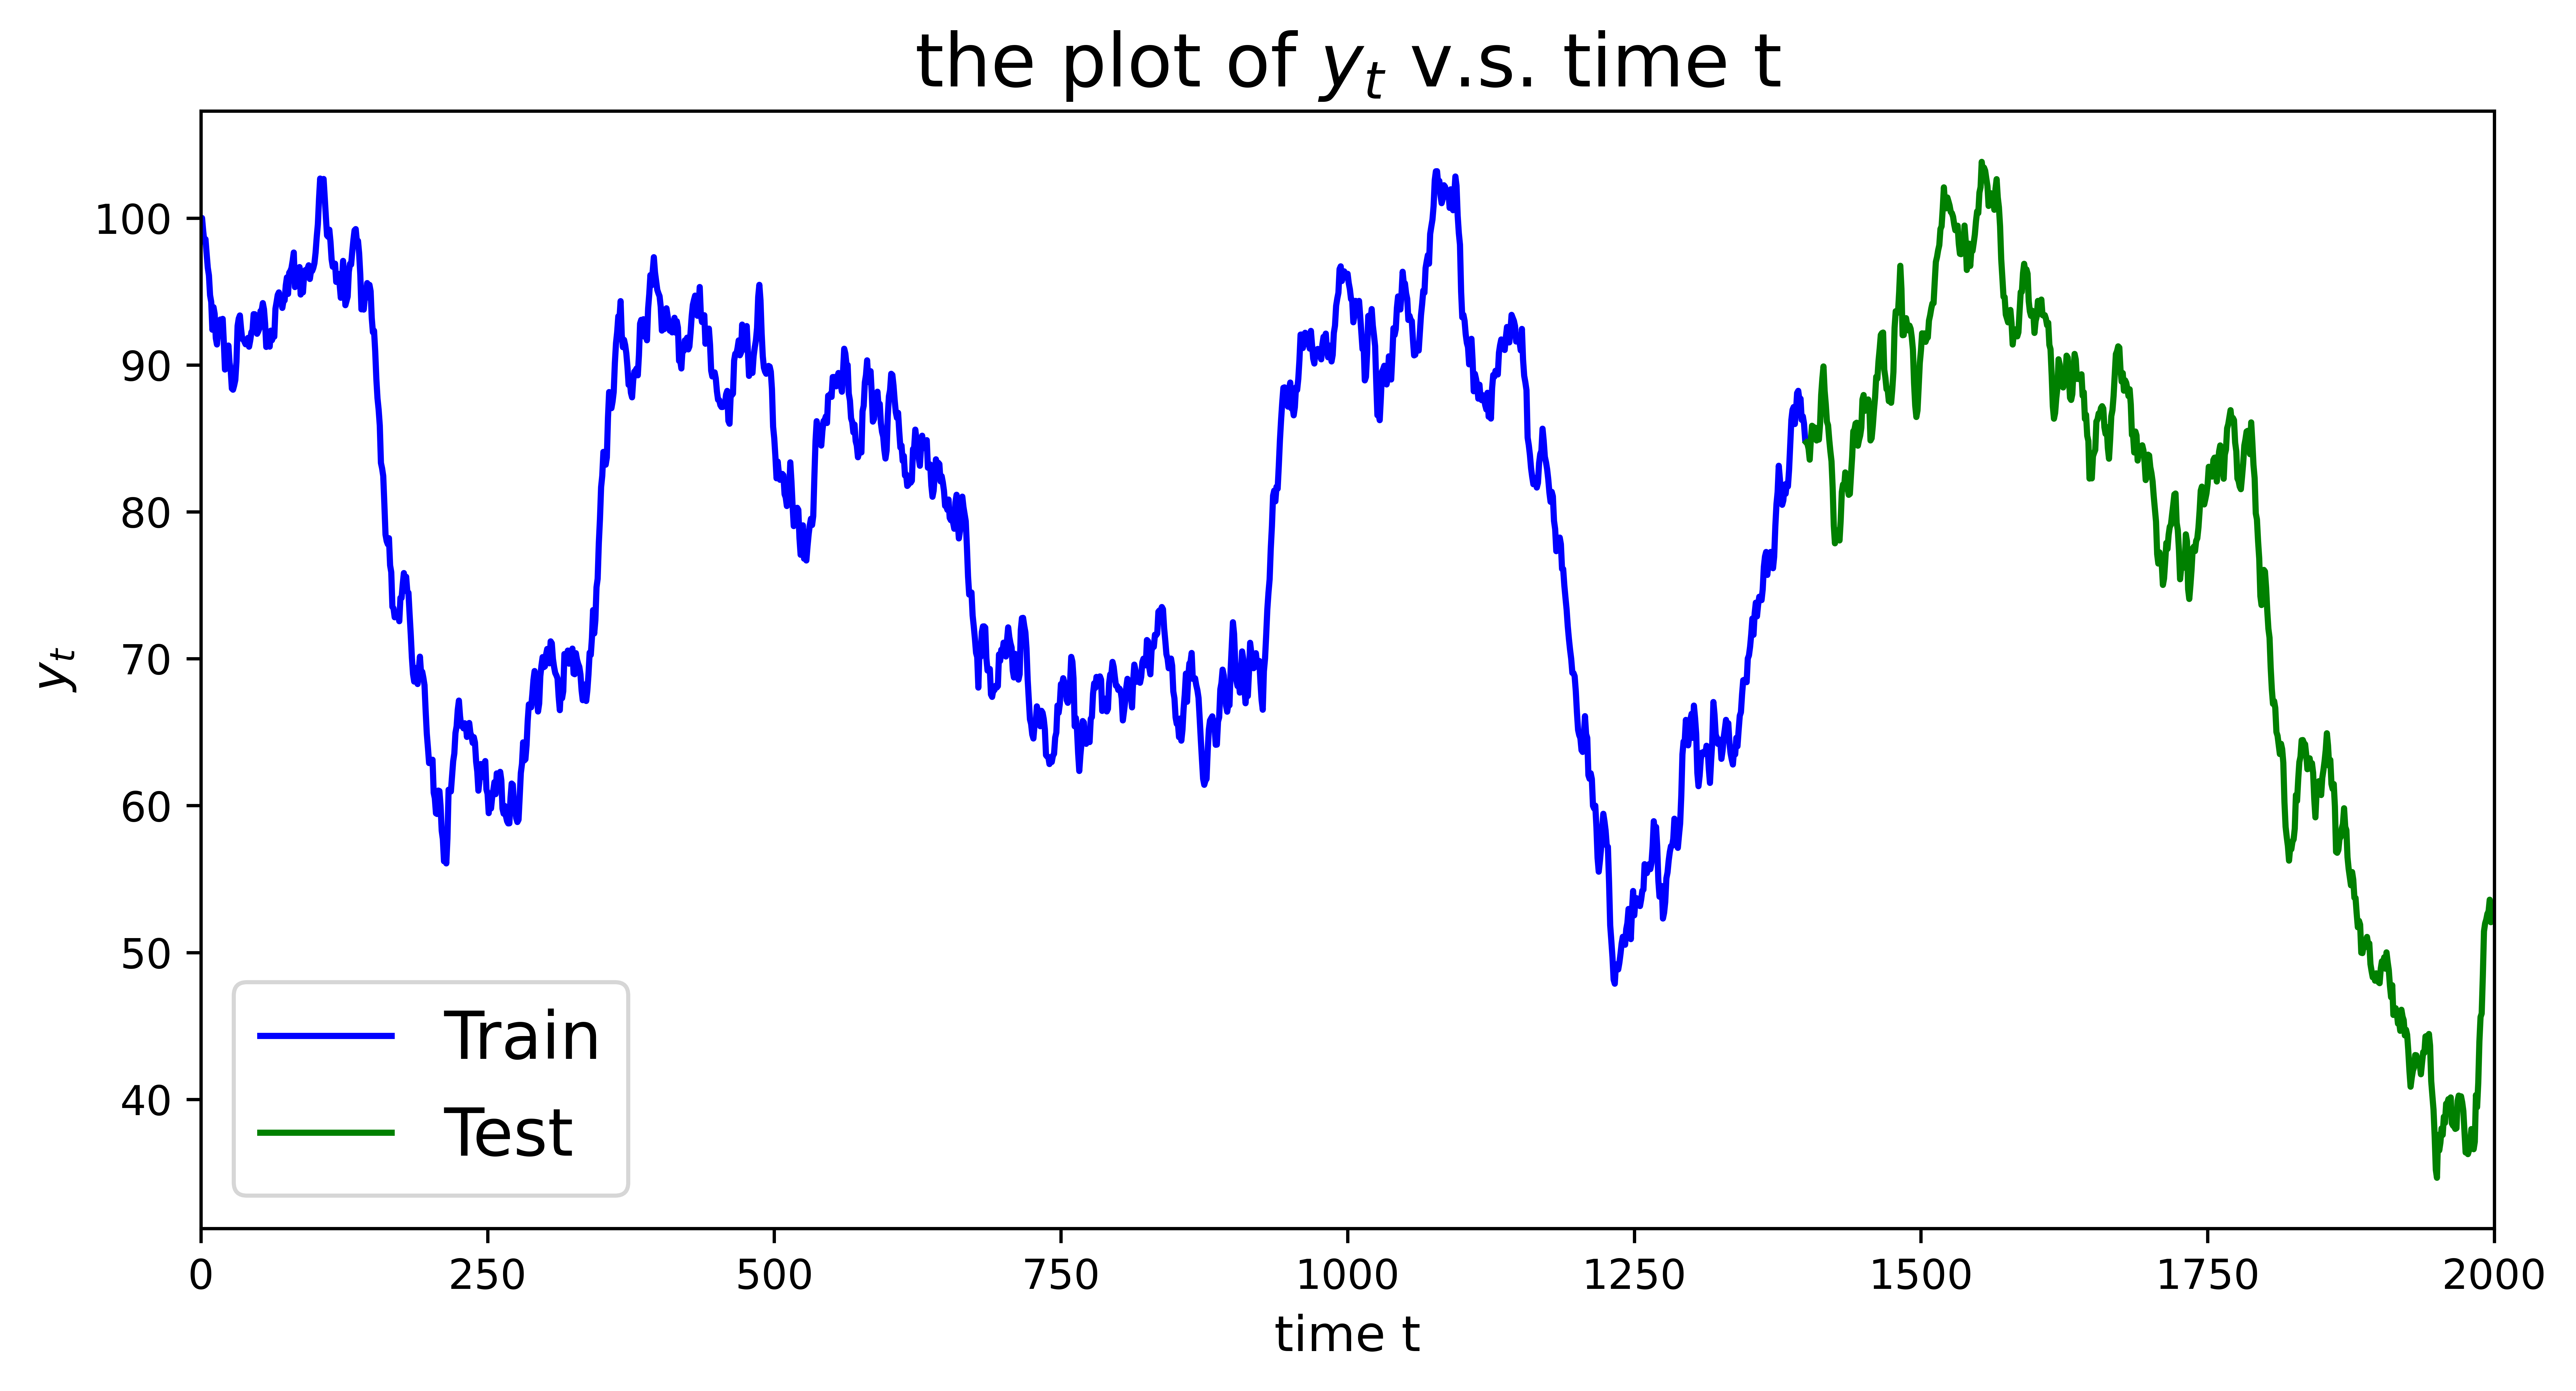

In [603]:
# Data Splitting
S_p = math.floor(T * 0.7) #Splitting point
train = d_y[0:S_p]
test  = d_y[S_p: T-1]
train_y = y[0:S_p]
test_y  = y[S_p: T-1]

# Observing the y with splitting of train and test data

plt.figure(figsize = [10,5], dpi =1000)
plt.xlim(0,2000)
plt.plot(t[0:S_p],y[0:S_p], color = 'blue')
plt.plot(t[S_p: T-1],y[S_p: T-1], color = 'green')
plt.legend(['Train', 'Test'], loc = 'lower left', prop={'size': 16})
plt.title('the plot of $y_{t}$ v.s. time t', size = 18)
plt.xlabel('time t', size= 12)
plt.ylabel('$y_{t}$', size = 12)


Text(0, 0.5, '$y_{t}$')

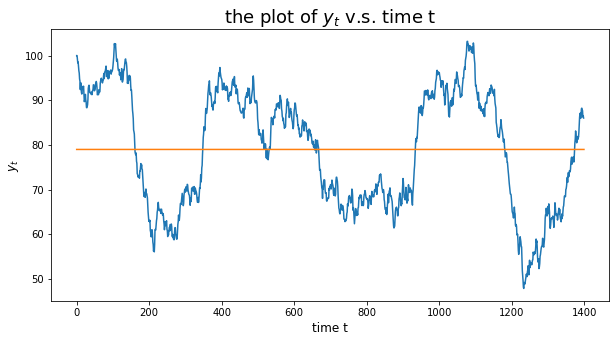

In [604]:
# Putting d_y back into y
mean= train_y.mean()

# plot of y
n=len(train)
v = np.ones(n)*mean
plt.figure(figsize = [10,5])
plt.plot(train_y[:-1])
plt.title('the plot of $y_{t}$ v.s. time t', size = 18)
plt.xlabel('time t', size= 12)
plt.plot(v)
plt.ylabel('$y_{t}$', size = 12)


(array([0.06084089, 0.        , 0.12168177, 0.        , 0.        ,
        0.        , 0.        , 0.06084089, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.06084089,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.06084089, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.06084089, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.06084089, 0.        , 0.        , 0.06

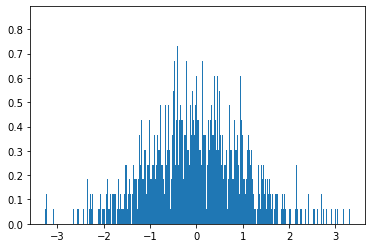

In [605]:
# histogram
plt.hist(d_y, bins=800,density= True)

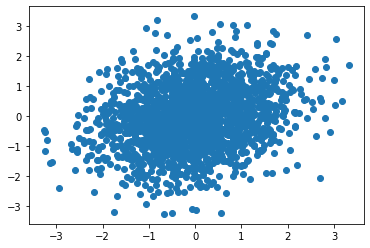

In [606]:
# lag plot 
plt.plot(d_y[1:],d_y[:-1],'o')

### Data Analysis

#### Histogram for the 'price' train_y and 'returns' train:

mean: 78.99206969587387 
 variance 173.8777883557248


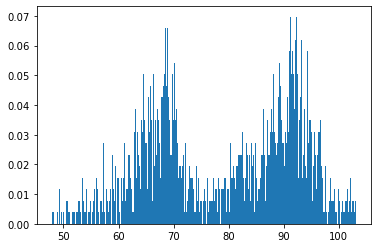

In [607]:
plt.hist(train_y, bins=300, density = True)
print('mean:', train_y.mean(), '\n variance', train_y.var())
# we can see a strong evidence for rejection of Normality, the distribution of the y represents a two-peaked shape.

(array([0.06539709, 0.03269855, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03269855, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03269855, 0.        , 0.        , 0.        ,
        0.        , 0.09809564, 0.        , 0.03269855, 0.        ,
        0.        , 0.        , 0.        , 0.03269855, 0.        ,
        0.13079418, 0.        , 0.03269855, 0.03269855, 0.06539709,
        0.03269855, 0.03269855, 0.03269855, 0.03269855, 0.        ,
        0.03269855, 0.03269855, 0.13079418, 0.03269855, 0.09809564,
        0.03269855, 0.        , 0.03269855, 0.03269855, 0.16349273,
        0.09809564, 0.09809564, 0.06539709, 0.09809564, 0.03269855,
        0.06539709, 0.        , 0.16349273, 0.13079418, 0.03269855,
        0.13079418, 0.09809564, 0.09809564, 0.09

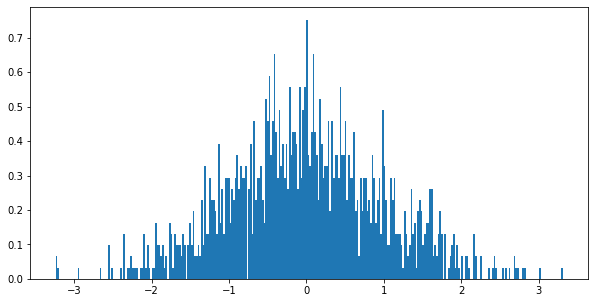

In [608]:
plt.figure(figsize = [10,5])
plt.hist(train, bins=300, density = True)

# This time, we can see a suspected bell shape in the returns.

#### ACF

Text(0.5, 1.0, 'Autocorrelation Function of price series')

<Figure size 10000x5000 with 0 Axes>

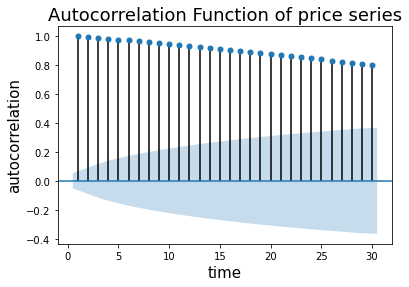

In [609]:
plt.figure(figsize = [10,5],dpi = 1000)
sgt.plot_acf(train_y,zero= False, lags=30)
plt.xlabel('time', fontsize = 15)
plt.ylabel('autocorrelation',fontsize = 15)
plt.title('Autocorrelation Function of price series',fontsize = 18)
# from here, we can observe a strong evidence of the non-stationarity existing in the price 'y', and 
    # this Non-stationarity presents a random walk pattern.

Text(0, 0.5, 'autocorrelation')

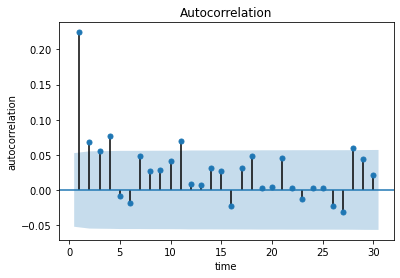

In [610]:
# try same process for the dy
sgt.plot_acf(train,zero= False, lags=30)
plt.xlabel('time')
plt.ylabel('autocorrelation')
# this time, we can see some strong autocorrelation in some lags, but in summary, the values of the autocorrelation 
    # represent randomness which implies a possible ARMA model for this time series.

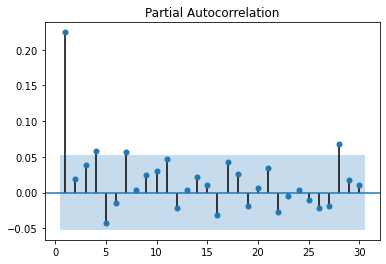

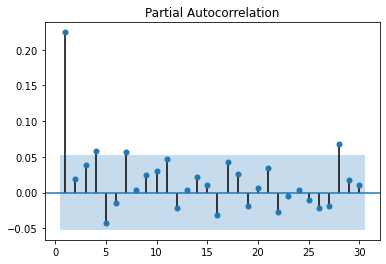

In [611]:
#Try PACF for dy
sgt.plot_pacf(train,zero= False, lags=30)
# PACF represents a strong relation on the first lags. 

In [612]:
# TEst for stationarity
adfuller(train)
# No significant evidence for rejection of Stationarity

(-15.152304653660554,
 6.770190625503121e-28,
 4,
 1395,
 {'1%': -3.435046325299633,
  '5%': -2.8636140901080456,
  '10%': -2.567874239154173},
 3834.399941430716)

In [613]:
# TEst for stationarity
adfuller(train_y)
# No significant evidence for rejection of Stationarity at 5% significance, but due to the graph above, we still deem 
    #the price time series non-stationary

(-2.1836747246455057,
 0.2122238525612667,
 7,
 1392,
 {'1%': -3.435056465447021,
  '5%': -2.8636185648927617,
  '10%': -2.567876622097536},
 3832.1091387321167)

#### ARMA Model Fitting

##### ARMA fit by whole data

In [614]:
model_auto = auto_arima(y,start_p = 1, start_q = 1, max_p=5, max_q=5, trace = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7387.931, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7429.096, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7390.242, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7396.371, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7429.178, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7389.928, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7389.928, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7390.033, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7388.250, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7389.936, Time=1.68 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7387.509, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7396.183, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7389.947, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7389.507, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [615]:
model_whole = ARIMA(y, order = [1,1,1])
model_whole_fit = model_whole.fit()
model_whole_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1999
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3689.966
Method:                       css-mle   S.D. of innovations              1.533
Date:                Tue, 02 Mar 2021   AIC                           7387.931
Time:                        23:59:00   BIC                           7410.333
Sample:                             1   HQIC                          7396.157
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0611      0.049     -1.255      0.209      -0.156       0.034
ar.L1.D.y      0.5156      0.120      4.311      0.000       0.281       0.750
ma.L1.D.y     -0.3134      0.132     -2.367      0.018      -0.573      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9394           +0.0000j            1.9394            0.0000
MA.1            3.1907           +0.0000j            3.1907            0.0000
-----------------------------------------------------------------------------
"""

In [616]:
1-(1-0.00000320)**50

0.0001599874566412529

##### ARMA fit by train

In [617]:
model_auto = auto_arima(train_y,start_p = 1, start_q = 1, max_p=5, max_q=5, trace = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3907.765, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3976.477, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3906.539, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3911.462, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3974.639, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3908.069, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3904.111, Time=1.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3906.094, Time=1.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3906.090, Time=1.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3905.144, Time=0.68 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3907.943, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3907.962, Time=1.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3902.164, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3905.866, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]          

In [618]:
model_auto = auto_arima(train[:1400],start_p = 1, start_q = 1, max_p=5, max_q=5, trace = True)
model_auto.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3910.631, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3979.764, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3909.430, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3914.445, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3977.953, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3910.941, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3906.877, Time=0.99 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3908.860, Time=1.28 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3908.856, Time=1.58 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3907.901, Time=1.28 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=3910.864, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3910.858, Time=0.76 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3904.942, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3908.749, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1400
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1948.471
Date:                Tue, 02 Mar 2021   AIC                           3904.942
Time:                        23:59:17   BIC                           3925.919
Sample:                             0   HQIC                          3912.784
                               - 1400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1661      0.048     24.155      0.000       1.072       1.261
ar.L2         -0.1906      0.031     -6.161      0.000      -0.251      -0.130
ma.L1         -0.9511      0.040    -24.044      0.000      -1.029      -0.874
sigma2         0.9470      0.036     26.651      0.000       0.877       1.017
===================================================================================
Ljung-Box (Q):                       41.51   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.40   Prob(JB):                         0.76
Heteroskedasticity (H):               1.04   Skew:                             0.04
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

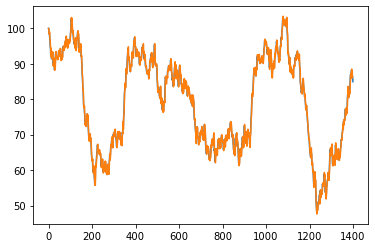

In [619]:
plt.plot(y[:1400])
predict_y = np.zeros(1400)
predict_y[:5]= y[:5]
error = np.zeros(1400)
for j in range(5,len(predict_y)-2):
    predict_y[j]=y[j-1]+1.1661*d_y[j-1]-0.1906*d_y[j-2] - 0.9511* error[j-1]
    error[j] = y[j]- predict_y[j]

plt.plot(predict_y[:-2])
# A poor prediction effect


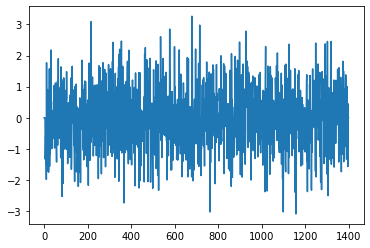

In [620]:
plt.plot(error)


(array([0.03375725, 0.        , 0.06751449, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03375725, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03375725, 0.03375725, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.10127174, 0.03375725,
        0.03375725, 0.06751449, 0.        , 0.06751449, 0.03375725,
        0.        , 0.06751449, 0.03375725, 0.03375725, 0.        ,
        0.03375725, 0.03375725, 0.03375725, 0.10127174, 0.10127174,
        0.06751449, 0.06751449, 0.03375725, 0.06751449, 0.        ,
        0.10127174, 0.13502899, 0.        , 0.06751449, 0.03375725,
        0.10127174, 0.06751449, 0.03375725, 0.10127174, 0.10127174,
        0.03375725, 0.16878624, 0.03375725, 0.16878624, 0.03375725,
        0.06751449, 0.13502899, 0.16878624, 0.03

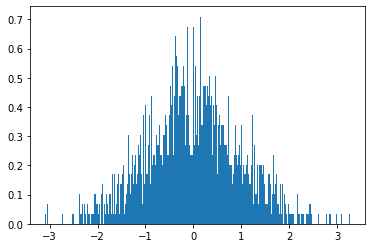

In [621]:
plt.hist(error, bins=300, density=True)

In [622]:
max(error)

3.260940611752929

Text(0.5, 1.0, 'Residual ACF Plot of ARIMA Model')

<Figure size 10000x5000 with 0 Axes>

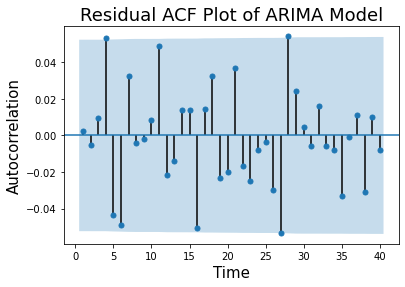

In [623]:
plt.figure(figsize = [10,5],dpi = 1000)
sgt.plot_acf(error[1:],zero = False, lags = 40) 
plt.xlabel('Time', fontsize=15)
plt.ylabel('Autocorrelation', fontsize=15)
plt.title('Residual ACF Plot of ARIMA Model', fontsize=18)

In [624]:
Prediction = model_auto.predict(n_periods =1400)

[-1.64892154e-01  1.29116982e-02  4.64931109e-02 ...  9.39798614e-21
  9.11130824e-21  8.83337521e-21]


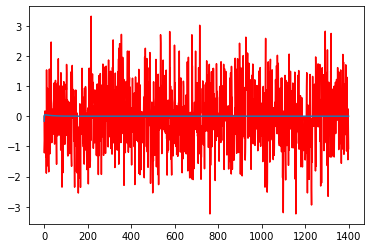

In [625]:
plt.plot(d_y[:1400], color = 'red', label = 'Price')
plt.plot(Prediction)
print(Prediction)

In [626]:
# try for the y
model_auto1 = auto_arima(train_y,trace = True, start_p = 1, start_q = 1, max_p=8, max_q=8,)
model_auto.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3907.765, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3976.477, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3906.539, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3911.462, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3974.639, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3908.069, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3904.111, Time=1.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3906.094, Time=1.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3906.090, Time=1.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3905.144, Time=0.68 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3907.943, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3907.962, Time=1.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3902.164, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3905.866, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1400
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1948.471
Date:                Tue, 02 Mar 2021   AIC                           3904.942
Time:                        23:59:27   BIC                           3925.919
Sample:                             0   HQIC                          3912.784
                               - 1400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1661      0.048     24.155      0.000       1.072       1.261
ar.L2         -0.1906      0.031     -6.161      0.000      -0.251      -0.130
ma.L1         -0.9511      0.040    -24.044      0.000      -1.029      -0.874
sigma2         0.9470      0.036     26.651      0.000       0.877       1.017
===================================================================================
Ljung-Box (Q):                       41.51   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.40   Prob(JB):                         0.76
Heteroskedasticity (H):               1.04   Skew:                             0.04
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [627]:
model_211 = ARIMA(train_y, order = [2,1,1])
model_fit_211 = model_211.fit()


res_211 = model_fit_211.resid
res_211 = res_211[:-1]
model_fit_211.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1399
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1947.055
Method:                       css-mle   S.D. of innovations              0.973
Date:                Tue, 02 Mar 2021   AIC                           3904.111
Time:                        23:59:28   BIC                           3930.328
Sample:                             1   HQIC                          3913.912
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0119      0.051     -0.233      0.816      -0.112       0.088
ar.L1.D.y      1.1661      0.045     26.138      0.000       1.079       1.253
ar.L2.D.y     -0.1906      0.030     -6.328      0.000      -0.250      -0.132
ma.L1.D.y     -0.9514      0.035    -27.410      0.000      -1.019      -0.883
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0315           +0.0000j            1.0315            0.0000
AR.2            5.0872           +0.0000j            5.0872            0.0000
MA.1            1.0510           +0.0000j            1.0510            0.0000
-----------------------------------------------------------------------------
"""

In [628]:
max(res_211)

3.264325787606526

Text(0, 0.5, 'Autocorrelation')

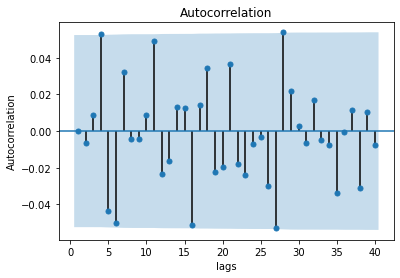

In [629]:
sgt.plot_acf(res_211[1:],zero = False, lags = 40) 
plt.xlabel('lags')
plt.ylabel('Autocorrelation')

[-1.70998713e-01  5.43375585e-03  3.86324395e-02  4.37207244e-02
  4.33271779e-02  4.18985875e-02  4.03077662e-02  3.87250258e-02
  3.71826254e-02  3.56857235e-02  3.42341880e-02  3.28268816e-02
  3.14625032e-02  3.01397527e-02  2.88573616e-02  2.76140989e-02
  2.64087708e-02  2.52402198e-02  2.41073239e-02  2.30089950e-02
  2.19441785e-02  2.09118518e-02  1.99110236e-02  1.89407329e-02
  1.80000477e-02  1.70880650e-02  1.62039087e-02  1.53467300e-02
  1.45157056e-02  1.37100375e-02  1.29289521e-02  1.21716993e-02
  1.14375519e-02  1.07258050e-02  1.00357749e-02  9.36679914e-03
  8.71823526e-03  8.08946045e-03  7.47987091e-03  6.88888126e-03
  6.31592396e-03  5.76044882e-03  5.22192242e-03  4.69982761e-03
  4.19366303e-03  3.70294262e-03  3.22719514e-03  2.76596374e-03
  2.31880549e-03  1.88529100e-03  1.46500397e-03  1.05754079e-03
  6.62510192e-04  2.79532822e-04 -9.17590888e-05 -4.51722087e-04
 -8.00701844e-04 -1.13903348e-03 -1.46704189e-03 -1.78504207e-03
 -2.09333937e-03 -2.39222

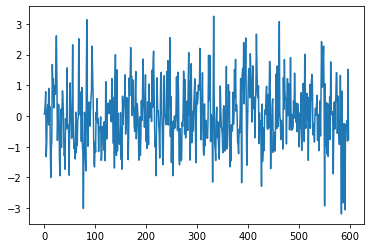

In [630]:
start = len(train_y)
end = start + len(test) -1
Prediction_history = model_fit_211.predict(start = start, end = end, dynamic= True)
print(Prediction_history)
plt.plot(Prediction_history-test)



## Trading Strategies
1.Define 3 self-financing long-only trading strategies with initial cash C0 = 10000. The
self-financing condition for the update of cash and volume at each time step is given by <br>
TV(t) = C(t) + p(t)V(t) = C(t +1) + p(t)V(t +1), <br>
for all time steps t. The long-only condition is given by V(t) ≥ 0 for all time steps. No
borrowing is also considered, C(t) ≥ 0 for all time steps. If your strategy has coefficients,
only use the training set to choose them.<br> <br>
2.Define the return of a trading strategy a at time t as,<br>
$r_a(t) = log ( \frac{TV_a (t) }{ TV_a (t-1)})$

### STRATEGY MAKING

#### Strategy General Function

In [631]:
# Strategy 1:  (TREND Following)
def STRATEGY_gen(ts, b_s, s_s,p_b=1,p_s=1):
    # Input: ts: time series, b_s: buy-in strategy, s_s: sell-out strategy, p_b(s): proportion of cash for buying (selling)
        # Output: TV: vector of Total Value in time series B: buying time C: Selling time
    cash = np.zeros(len(ts))
    cash[0] = 10000
    w = np.zeros(len(ts))
    w[0] = 0
    B = np.zeros(len(ts))
    S = np.zeros(len(ts))
    
    
    for t in range(1,len(ts)):
        b=0
        s=0
    # Condition for longing (No leverages)
        if cash[t-1]>0:
            b = b_s(ts[:t])
            if b == 1:
                V = math.floor((cash[t-1]*p_b)/ ts[t])     # the amount of shares bought at time t.
                w[t] = w[t-1] + V
                cash[t] = cash[t-1]- V *ts[t]            # cash changes
                B[t] = np.sum(cash[t]!=cash[t-1])        # mark time t as buying time
           
    # Condition for selling: (No borrowing)
        if w[t-1] >0 :
            s = s_s(ts[:t])
            if s == 1:
                V = w[t-1] * p_s                            # the amount of shares sold
                w[t] = w[t-1] -V
                cash[t] = cash[t-1] + V * ts[t]
                S[t] = np.sum(cash[t]!=cash[t-1])
    
    #if no buying and selling required:
        if b + s ==0:
        #No operations
            w[t]=w[t-1]
            cash[t]=cash[t-1]
        
        TV = [a*b for a,b in zip(w,ts)] + cash

    return TV, B, S, cash



#### TF1

In [632]:


# Buying Strategy 1
def TF_b_s1(ts):
    # at least the indicator has enough interval for calculation (> horizon)
        # return 1= buy now, 0= hold on
    
    time_window = 20              # time window requirement
    N = len(ts)
    
    # Time Window:
    if N < time_window:
        return 0
    
    # Moving average calculation: (normal MA)
    MA = np.average( ts[-time_window:])
    
    
    # Strategy of buying 
    if ts[-1] > MA:
        return 1
    else: 
        return 0
    
# Selling Strategy 1
def TF_s_s1(ts):
    # at least the indicator has enough interval for calculation (> horizon)
        # return 1= sell now, 0= hold on
    time_window = 27              # time window requirement
    N = len(ts)
    
    # Time Window:
    if N < time_window:
        return 0
    
    # Moving average calculation: (normal MA)
    MA = np.average( ts[-time_window:])
    
    
    # Strategy of selling 
    if ts[-1] < MA:
        return 1
    else: 
        return 0
    

#### TF2

In [633]:
# Buying and selling 2
# Buy and sell depending on the signal generated from mA5 and MA27

# Buying Strategy 2
def TF_b_s2(ts):
    # at least the indicator has enough interval for calculation (> horizon)
        # return 1= buy now, 0= hold on
    # Buying if the 5 MA(1) breaches the 27 MA (2)
    
    time_window2 = 27              # time window requirement
    time_window1 =  5
    N = len(ts)
    
    # Time Window:
    if N < time_window1:
        return 0
    
    # Moving average calculation: (normal MA)
    MA1 = np.average( ts[-time_window1:])
    MA2 = np.average( ts[-time_window2:])
    
    
    # Strategy of buying 
    if MA1 > MA2:
        return 1
    else: 
        return 0
    
def TF_s_s2(ts):
    # at least the indicator has enough interval for calculation (> horizon)
        # return 1= buy now, 0= hold on
    # Buying if the 5 MA(1) breaches the 27 MA (2)
    
    time_window2 = 27              # time window requirement
    time_window1 =  5
    N = len(ts)
    
    # Time Window:
    if N < time_window1:
        return 0
    
    # Moving average calculation: (normal MA)
    MA1 = np.average( ts[-time_window1:])
    MA2 = np.average( ts[-time_window2:])
    
    
    # Strategy of buying 
    if MA1 < MA2:
        return 1
    else: 
        return 0

#### MA1

In [634]:
# Compute MA27 for train
MA27 = np.zeros_like(y)
for t in range(27, len(y)):
    MA27[t] = np.mean(y[t-27:t])



In [635]:
# Compute MA27
MA27 = np.zeros_like(train_y)
for t in range(27, len(train_y)):
    MA27[t] = np.mean(train_y[t-27:t])

# Define the mean reverting function
def MR_Stra(trend, MA, D1, D2, Ts, ini_cash):
    price = 0
    cash = np.zeros_like(MA)
    w = np.zeros_like(MA)
    TV = [ini_cash]
    cash[0] = ini_cash
    for i in range(1,len(MA)):
    # buy
        if trend[i] <=  D1*MA[i] and cash[i-1] != 0:
            w[i] = cash[i-1]/trend[i] 
            cash[i] = 0
            price = trend[i]
    # sell
        elif trend[i] >= D2*MA[i] and w[i-1] != 0:
            cash[i] = w[i-1]*trend[i] 
            w[i] = 0

        elif trend[i] < Ts*price and w[i-1] != 0:
            cash[i] = w[i-1]*trend[i] 
            w[i] = 0

    # keep money
        else: 
            cash[i] = cash[i-1]
            w[i] = w[i-1]

        TV.append(cash[i] + w[i]*trend[i])
    return TV

# Find the optimal parameter for mean reverting function
def best_parameter(trend, MA, ini_cash):
  # Find optimal D and Ts
    best_profit = -10000
    best_D1 = 0
    best_D2 = 0
    for D1 in np.linspace(0,1,11):
        for D2 in np.linspace(1,2,11):
            for Ts in np.linspace(0,1,11):
                profit = MR_Stra(trend, MA, D1, D2, Ts, ini_cash)
                if profit[-1] > best_profit:
                    best_profit = profit[-1]
                    best_D1 = D1
                    best_D2 = D2
                    best_Ts = Ts
    return best_D1,best_D2,best_Ts,best_profit

# Calculate the trend of total value by mean reverting method 
# depending on different period 
def period(p,t,trend_p,MA_p):
    iter = int(t/p)
    trend = np.zeros([iter,p])
    MA = np.zeros([iter,p])
    profit = 0
    TV = []
    ini_cash = 10000
    for i in range(iter):
        trend[i] = trend_p[(i)*p:(i+1)*p]
        MA[i] = MA_p[(i)*p:(i+1)*p]
    for j in range(1,len(trend)):
        D1,D2,Ts,profit_pre = best_parameter(trend[j-1],MA[j-1],ini_cash)
        TV += MR_Stra(trend[j], MA[j], D1, D2, Ts, ini_cash)
        ini_cash = TV[-1]
    return list((np.ones(p)*10000))+TV




In [636]:
# get the total value vector for each period
TV25 = period(25,1400,train_y,MA27)
TV50 = period(50,1400,train_y,MA27)
TV100 = period(100,1400,train_y,MA27)


In [637]:
TV50 = period(50,1400,train_y,MA27)

Text(0, 0.5, 'Total Value')

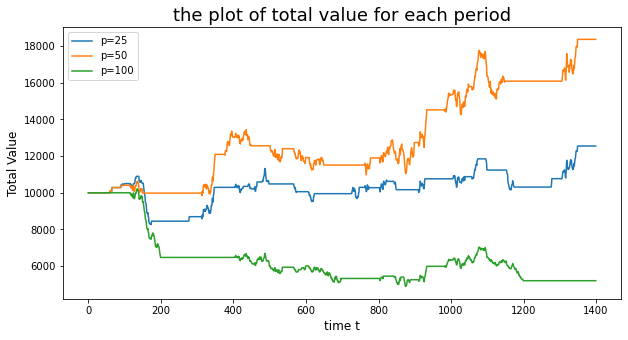

In [638]:
# plot
plt.figure(figsize = [10,5])
plt.plot(TV25)
plt.plot(TV50)
plt.plot(TV100)
plt.legend(['p=25','p=50','p=100'])
plt.title('the plot of total value for each period', size = 18)
plt.xlabel('time t', size= 12)
plt.ylabel('Total Value', size = 12)

In [639]:
# (Mean Reverting)
def STRATEGY_MA(ts, whole=1):
    # Input: ts: time series, b_s: buy-in strategy, s_s: sell-out strategy, p_b(s): proportion of cash for buying (selling)
        # Output: TV: vector of Total Value in time series B: buying time C: Selling time
        
    cash = np.zeros(len(ts))
    cash[0] = 10000
    w = np.zeros(len(ts))
    w[0] = 0
    B = np.zeros(len(ts))
    S = np.zeros(len(ts))
    
    
    for t in range(1,len(ts)):
        b=0
        s=0
    # Condition for longing (No leverages)
        if cash[t-1]>0:
            b = b_s(ts[:t])
            if b == 1:
                V = math.floor((cash[t-1]*p_b)/ ts[t])     # the amount of shares bought at time t.
                w[t] = w[t-1] + V
                cash[t] = cash[t-1]- V *ts[t]            # cash changes
                B[t] = np.sum(cash[t]!=cash[t-1])        # mark time t as buying time
           
    # Condition for selling: (No borrowing)
        if w[t-1] >0 :
            s = s_s(ts[:t])
            if s == 1:
                V = w[t-1] * p_s                            # the amount of shares sold
                w[t] = w[t-1] -V
                cash[t] = cash[t-1] + V * ts[t]
                S[t] = np.sum(cash[t]!=cash[t-1])
    
    #if no buying and selling required:
        if b + s ==0:
        #No operations
            w[t]=w[t-1]
            cash[t]=cash[t-1]
        
        TV = [a*b for a,b in zip(w,ts)] + cash

    return TV, B, S, cash





# Buying Strategy 3
def b_s(ts):
    # at least the indicator has enough interval for calculation (> horizon)
        # return 1= buy now, 0= hold on
            # BUY when 
    time_window2 = 90              # time window requirement
    time_window1 =  30
    N = len(ts)
    
    # Time Window:
    if N < time_window1:
        return 0
    
    # Moving average calculation: (normal MA)
    MA1 = np.average( ts[-time_window1:])
    MA2 = np.average( ts[-time_window2:])
    
    
    # Strategy of buying 
    if MA1 > MA2:
        return 0
    else: 
        return 1
    

    
# Selling Strategy 3
def MR_s_s1(ts):
    # at least the indicator has enough interval for calculation (> horizon)
        # return 1= sell now, 0= hold on
    time_window2 = 90              # time window requirement
    time_window1 =  30
    N = len(ts)
    
    # Time Window:
    if N < time_window1:
        return 0
    
    # Moving average calculation: (normal MA)
    MA1 = np.average( ts[-time_window1:])
    MA2 = np.average( ts[-time_window2:])
    
    
    # Strategy of buying 
    if MA1 > MA2:
        return 1
    else: 
        return 0

#### ARMA

In [640]:
# ARMA
# buy strategy
def ARMA_buy(ts):
    if len(ts)<3:
        return 0

    d_ts = ts[:-1] - ts[1:] # length len(ts) -1
    error = np.zeros(len(ts))
    
    for t in range(3,len(ts)-1):
        error[t] = d_ts[t] - ( 1.661* d_ts[t-1] - 0.1906 * d_ts[t-2] - 0.9511 * error[t-1])
    
    predict_dy =  1.661* d_ts[-1] - 0.1906 * d_ts[-2] - 0.9511 * error[-1]
    
    if predict_dy >0:
        return 1
    else:
        return 0
    

def ARMA_sell(ts):
    if len(ts)<3:
        return 0

    d_ts = ts[:-1] - ts[1:] # length len(ts) -1
    error = np.zeros(len(ts))
    
    for t in range(3,len(ts)-1):
        error[t] = d_ts[t] - ( 1.661* d_ts[t-1] - 0.1906 * d_ts[t-2] - 0.9511 * error[t-1])
    
    predict_dy =  1.661* d_ts[-1] - 0.1906 * d_ts[-2] - 0.9511 * error[-1]
    
    if predict_dy <0:
        return 1
    else:
        return 0
    

### Strategy improving

In [641]:
# The function for operation range improvement for higher profit.
def prop_improve(ts, b_s, s_s):
    P_vec = np.zeros((10,10))
    Q_vec = np.zeros(10)
    a=0                       # p counter
    
    for p in range(1,100,10):
        t=0                   # q counter
        p_o = p/100
        for q in range(1,100,10):
            q_o = q/100
            A, B, S, cash=STRATEGY_gen(ts,b_s,s_s,p_o,q_o)
            Q_vec[t] = A[-1]                     # last Total Value under q = q_o
            t += 1
        P_vec[a] = Q_vec
        a += 1
    return P_vec
            

In [642]:
TF1_prop = prop_improve(train_y, TF_b_s1, TF_s_s1)

In [643]:
ARMA_prop = prop_improve(train_y, ARMA_buy, ARMA_sell)
TF2_prop = prop_improve(train_y, TF_b_s2, TF_s_s2)
TF1_prop = prop_improve(train_y, TF_b_s1, TF_s_s1)

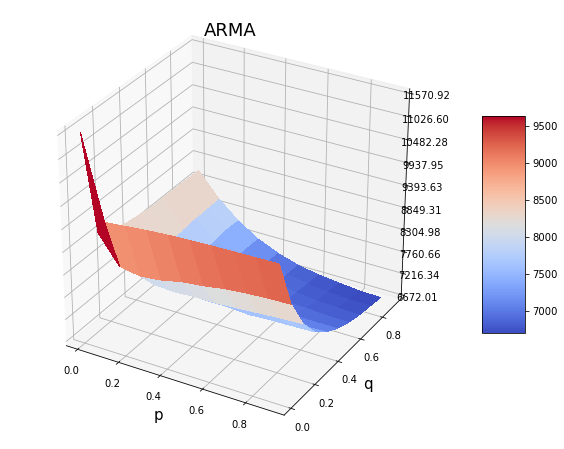

In [683]:
# 3d print for ARMA_prop

fig = plt.figure(figsize=[10,8])
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0.01, 0.92, 0.1)
Y = np.arange(0.01, 0.92, 0.1)
X, Y = np.meshgrid(X, Y)

Z = ARMA_prop

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('ARMA', fontsize= 18)
plt.xlabel('p', fontsize = 15)
plt.ylabel('q',  fontsize = 15)

plt.show()

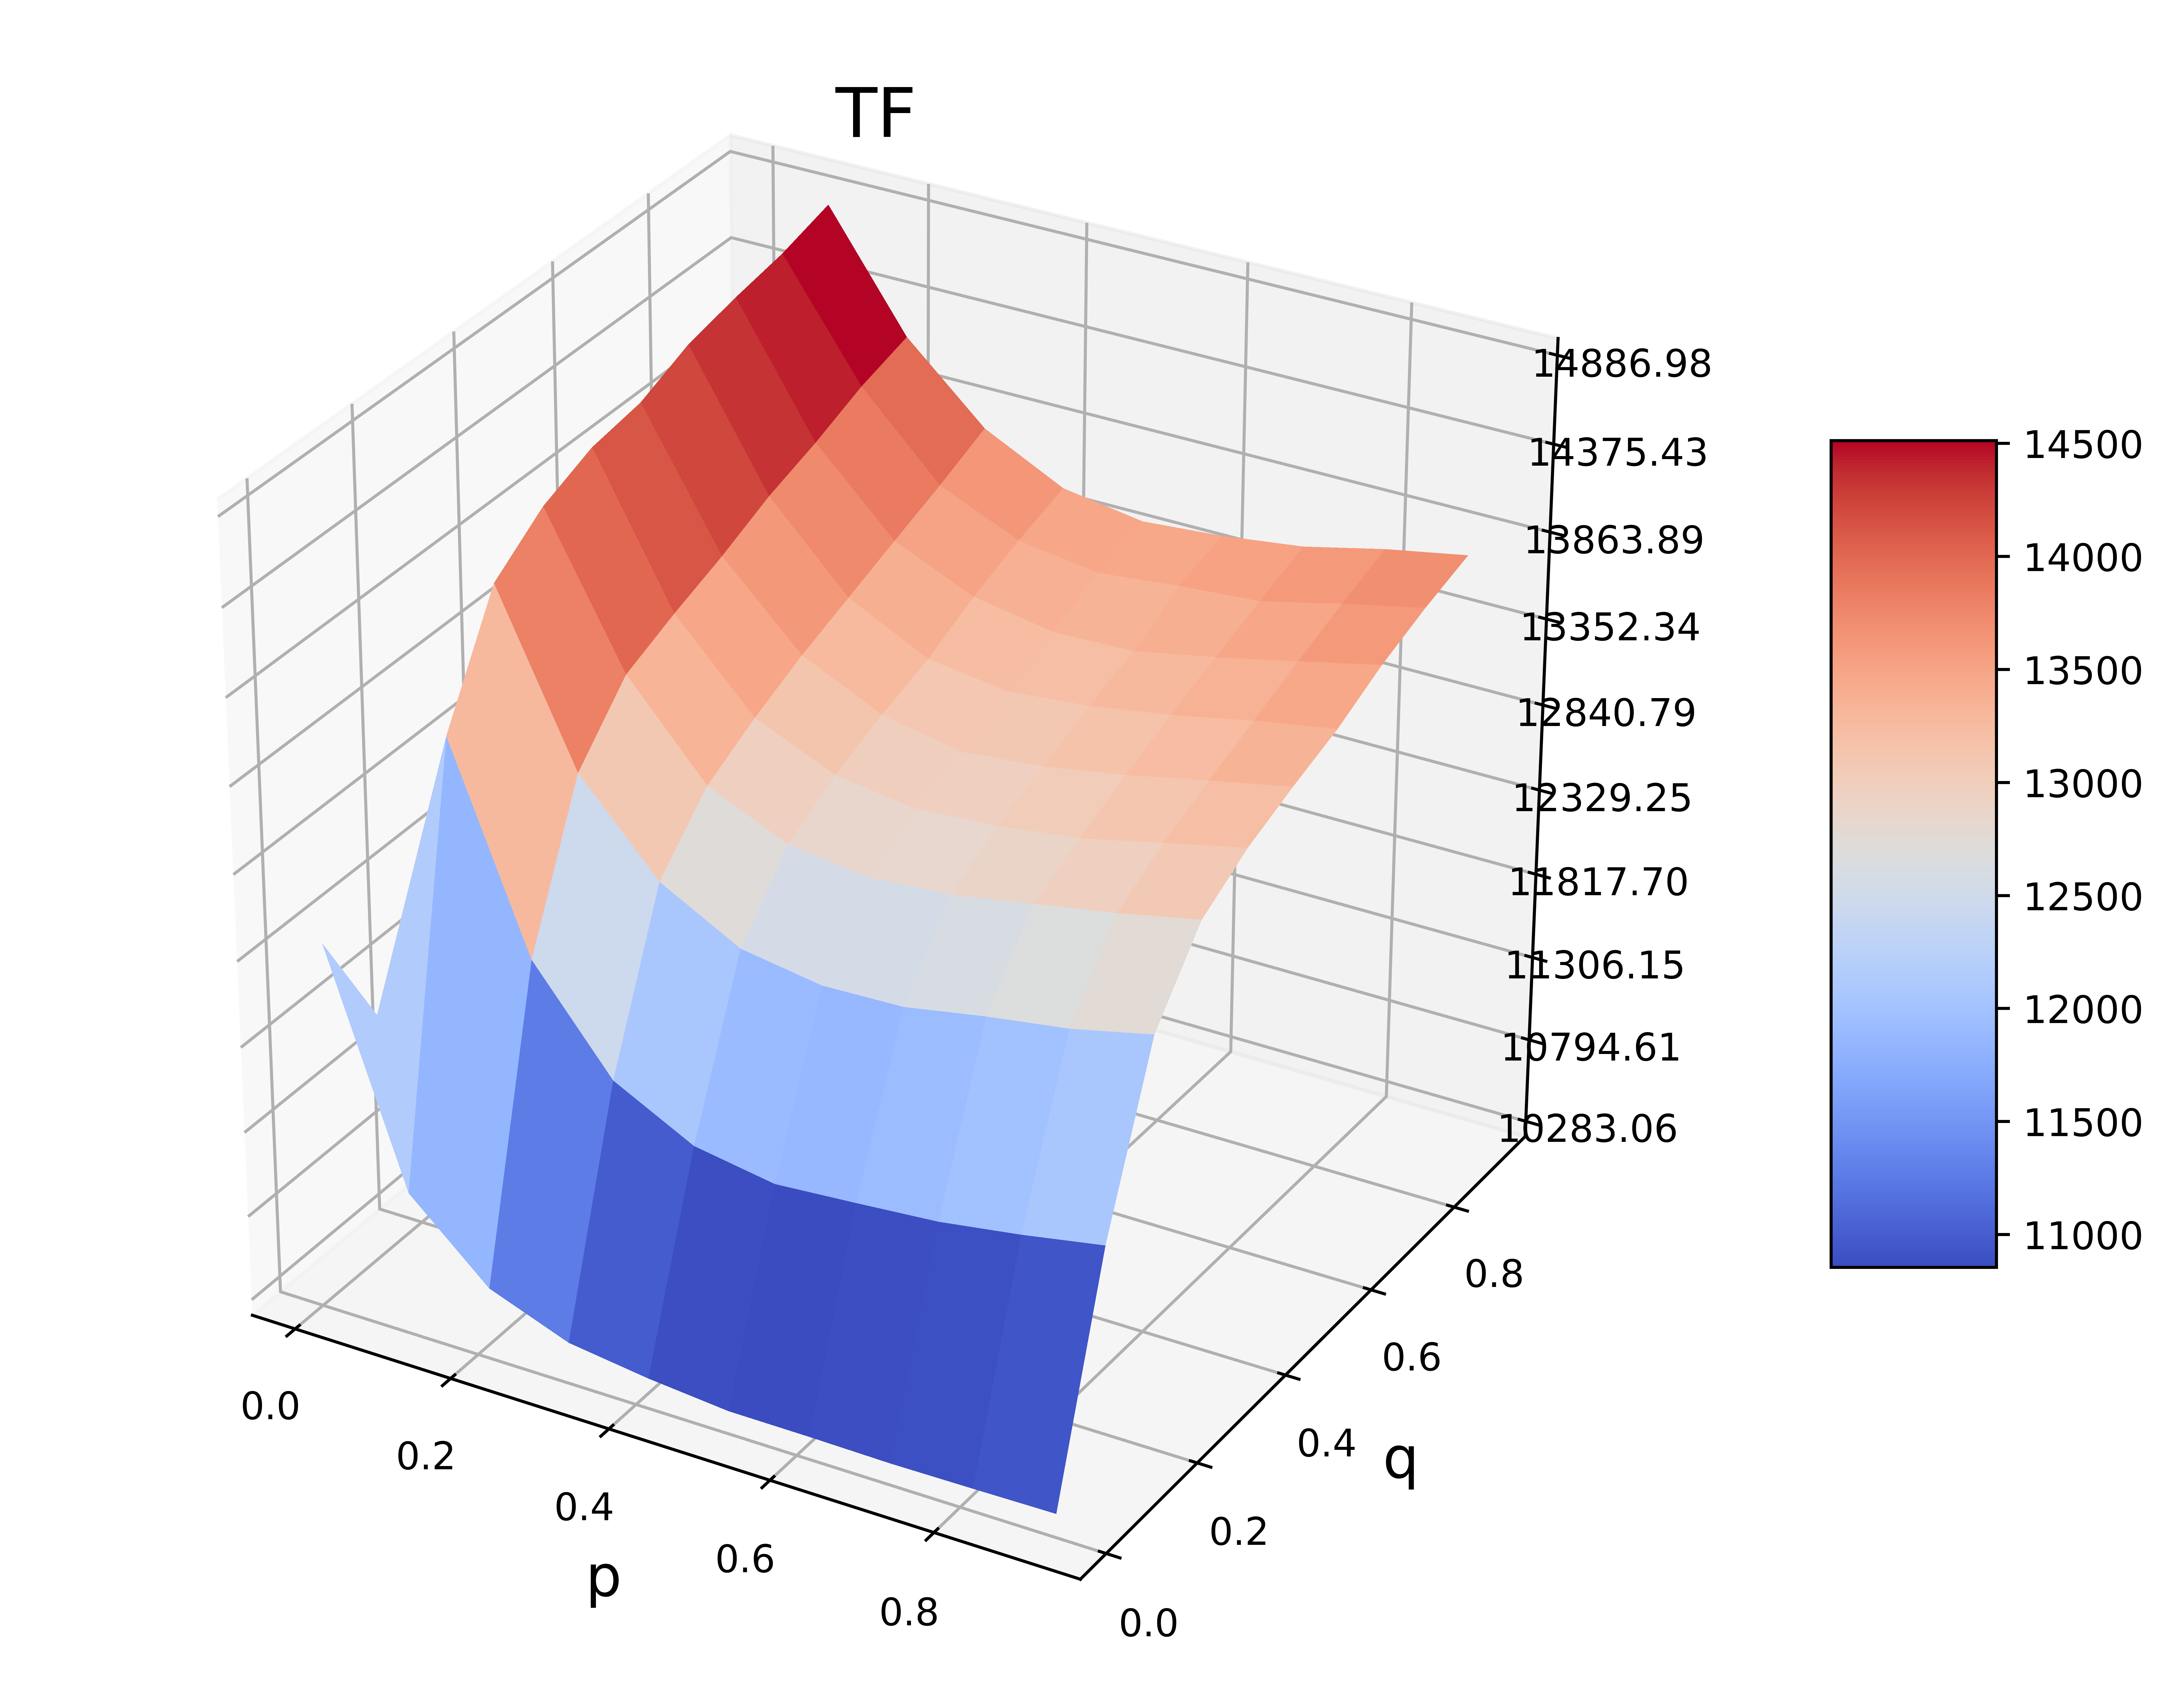

In [684]:
# 3d print for TF1

fig = plt.figure(figsize=[10,8],dpi=1000)
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0.01, 0.92, 0.1)
Y = np.arange(0.01, 0.92, 0.1)
X, Y = np.meshgrid(X, Y)

Z = TF1_prop

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('TF', fontsize= 18)
plt.xlabel('p', fontsize = 15)
plt.ylabel('q',  fontsize = 15)

plt.show()

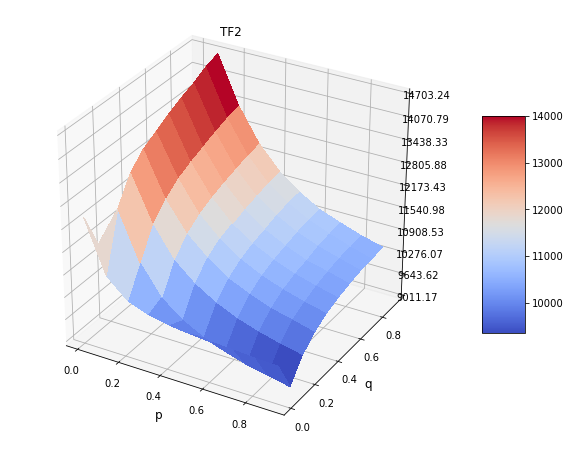

In [646]:
# 3d print for TF2

fig = plt.figure(figsize=[10,8])
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0.01, 0.92, 0.1)
Y = np.arange(0.01, 0.92, 0.1)
X, Y = np.meshgrid(X, Y)

Z = TF2_prop

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('TF2')
plt.xlabel('p', fontsize = 12)
plt.ylabel('q',  fontsize = 12)

plt.show()

In [647]:
# the best proportion of p, q of three strategies
TF1_max_p, TF1_max_q = np.where(TF1_prop == TF1_prop.max())
TF2_max_p, TF2_max_q = np.where(TF2_prop == TF2_prop.max())
ARMA_max_p, ARMA_max_q = np.where(ARMA_prop == ARMA_prop.max())

print('the best props for TF1 are: ', TF1_max_p, TF1_max_q, '\n' \
       'the best props for TF2 are: ', TF2_max_p, TF2_max_q, '\n',\
        'the best props for ARMA are: ', ARMA_max_p, ARMA_max_q, '\n')



the best props for TF1 are:  [9] [1] 
the best props for TF2 are:  [9] [1] 
 the best props for ARMA are:  [0] [0] 



### Result Discussion - strategy

In [648]:
y[-1]=y[-2]

In [649]:
#TF1:
TF1 , B1, S1, cash1= STRATEGY_gen(y, TF_b_s1, TF_s_s1,0.91,0.11)
#ARMA:
ARMA1, B_ARMA, S_ARMA, cash_ARMA = STRATEGY_gen(y, ARMA_buy, ARMA_sell, 0.01, 0.01)
#MR:
MA30 = np.zeros_like(y)
for t in range(30, len(y)):
    MA30[t] = np.mean(y[t-30:t])

TV50 = period(50,2000,y,MA30)

In [650]:
# Train & Test
TF_Train = TF1[:1399]
TF_Test  = (TF1[1400:]/TF1[1400])*10000
MR_Train = TV50[:1399]
MR_Test = TV50[1400:]/TV50[1400]*10000
ARMA_Train = ARMA1[:1399]
ARMA_Test = ARMA1[1400:]/ARMA1[1400]*10000
test_y = test_y/test_y[0]*10000

In [651]:
test_y

array([10000.        ,  9989.68426248,  9951.00601948,  9862.78622372,
       10024.61559504, 10134.94512255, 10128.16940247, 10090.22465662,
       10118.88212301, 10016.93932997, 10056.61682488, 10023.95383812,
       10143.34224235, 10383.43184027, 10511.68681966, 10611.65480531,
       10416.59641911, 10307.61081759, 10167.59975792, 10139.73367522,
       10026.29755442,  9930.76419122,  9849.98913448,  9638.05766312,
        9331.68737734,  9190.4747017 ,  9286.58104703,  9294.60425298,
        9251.21782957,  9213.52718275,  9372.41794927,  9603.64149376,
        9662.69196794,  9637.49735678,  9760.13352826,  9733.74234003,
        9638.19800599,  9580.00154201,  9587.32526678,  9739.15433417,
        9885.6826215 , 10091.26519038, 10102.71963557, 10153.28653649,
       10159.50972375,  9974.99745271, 10021.34152978, 10056.27234496,
       10119.12914159, 10347.08588974, 10382.02049607, 10254.96518992,
       10259.28561254, 10261.0023501 , 10346.32129041, 10290.86574565,
      

##### Graph

Text(0, 0.5, 'TV (price)')

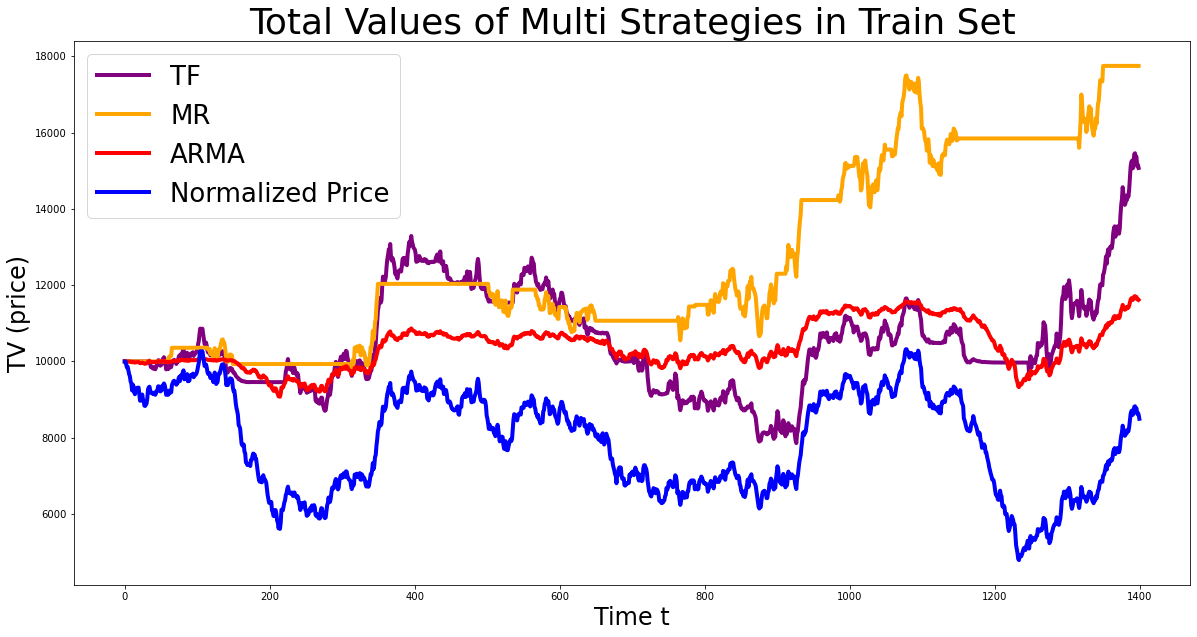

In [652]:
# Trending Strategy

plt.figure(figsize = [20,10])
plt.plot(TF_Train, color = 'purple',linewidth=4)
plt.plot(MR_Train, color= 'orange',linewidth=4)
plt.plot(ARMA_Train, color = 'red', linewidth=4)
plt.plot(train_y*100, color = 'blue',linewidth=4)

#B_date = np.where(B1 == 1)[0]
#S_date = np.where(S1 == 1)[0]
#plt.plot(B_date,TF1[B_date],'o', color='red',markersize=3)
#plt.plot(S_date,TF1[S_date],'o', color='green',markersize=3)

#B_date = np.where(B2 == 1)[0]
#S_date = np.where(S2 == 1)[0]
#plt.plot(B_date,TF2[B_date],'o', color='red',markersize=3)
#plt.plot(S_date,TF2[S_date],'o', color='green',markersize=3)

#B_date = np.where(B_MR == 1)[0]
#S_date = np.where(S_MR == 1)[0]
#plt.plot(B_date,MR1[B_date],'o', color='red',markersize=3)
#plt.plot(S_date,MR1[S_date],'o', color='green',markersize=3)

#B_date = np.where(B_ARMA == 1)[0]
#S_date = np.where(S_ARMA == 1)[0]
#plt.plot(B_date,ARMA1[B_date],'o', color='red',markersize=3)
#plt.plot(S_date,ARMA1[S_date],'o', color='green',markersize=3)


plt.title('Total Values of Multi Strategies in Train Set',fontsize=36)
plt.legend(['TF','MR','ARMA', 'Normalized Price'],prop={'size': 26})
plt.xlabel('Time t',fontsize=24)
plt.ylabel('TV (price)',fontsize=24)




##### TEST

In [653]:
TF1T , B1T, S1T, cash1T= STRATEGY_gen(test_y, TF_b_s1, TF_s_s1,0.91,0.11)
TF2T , B2T, S2T, cash2T= STRATEGY_gen(test_y, TF_b_s2, TF_s_s2,0.91,0.11)
ARMA1T, B_ARMAT, S_ARMAT, cash_ARMAT = STRATEGY_gen(test_y, ARMA_buy, ARMA_sell, 0.01, 0.01)

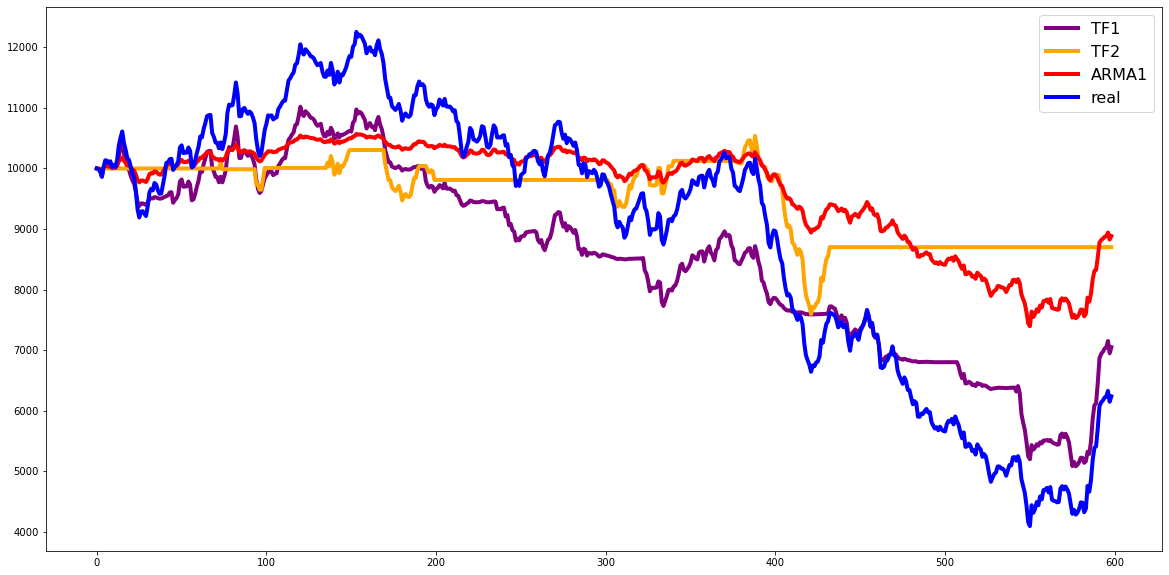

In [654]:

plt.figure(figsize = [20,10])
plt.plot(TF_Test[:-1], color = 'purple',linewidth=4)
plt.plot(MR_Test[:-1], color= 'orange',linewidth=4)
plt.plot(ARMA_Test[:-1], color = 'red', linewidth=4)
plt.plot(test_y, color = 'blue',linewidth=4)
#B_date = np.where(B1 == 1)[0]
#S_date = np.where(S1 == 1)[0]
#plt.plot(B_date,TF1[B_date],'o', color='red',markersize=3)
#plt.plot(S_date,TF1[S_date],'o', color='green',markersize=3)

#B_date = np.where(B2 == 1)[0]
#S_date = np.where(S2 == 1)[0]
#plt.plot(B_date,TF2[B_date],'o', color='red',markersize=3)
#plt.plot(S_date,TF2[S_date],'o', color='green',markersize=3)

#B_date = np.where(B_MR == 1)[0]
#S_date = np.where(S_MR == 1)[0]
#plt.plot(B_date,MR1[B_date],'o', color='red',markersize=3)
#plt.plot(S_date,MR1[S_date],'o', color='green',markersize=3)

#B_date = np.where(B_ARMA == 1)[0]
#S_date = np.where(S_ARMA == 1)[0]
#plt.plot(B_date,ARMA1[B_date],'o', color='red',markersize=3)
#plt.plot(S_date,ARMA1[S_date],'o', color='green',markersize=3)



plt.legend(['TF1','TF2','ARMA1', 'real'],prop={'size': 16})



##### Overall


In [655]:
TF1O , B1O, S1O, cash1O= STRATEGY_gen(y[:-1], TF_b_s1, TF_s_s1,0.91,0.11)
TF2O , B2O, S2O, cash2O= STRATEGY_gen(y[:-1], TF_b_s2, TF_s_s2,0.91,0.11)
ARMA1O, B_ARMAO, S_ARMAO, cash_ARMAT = STRATEGY_gen(y[:-1], ARMA_buy, ARMA_sell, 0.01, 0.01)

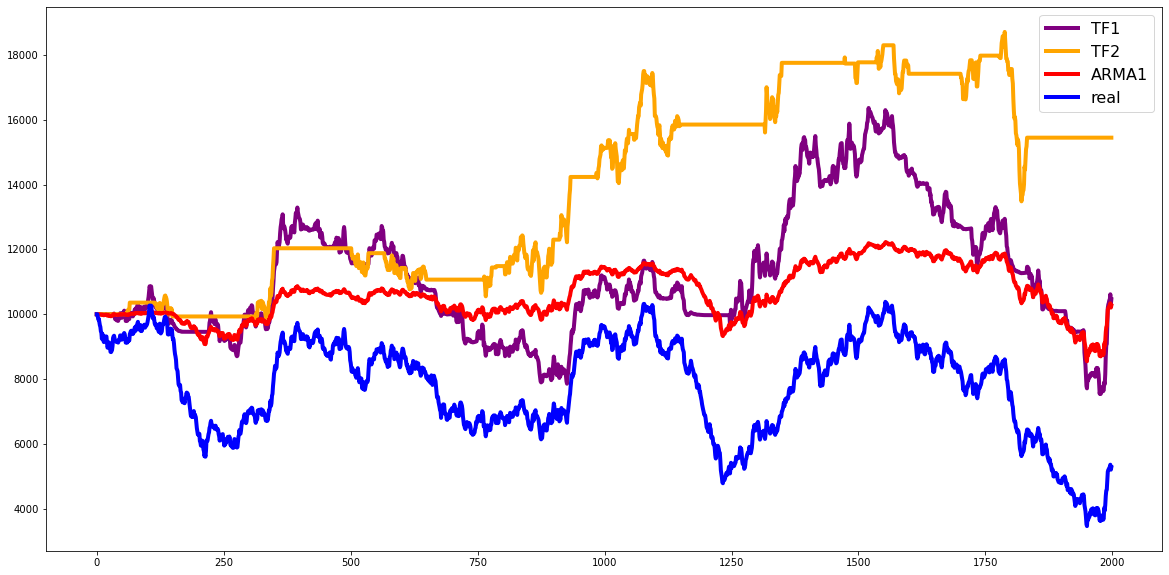

In [656]:


plt.figure(figsize = [20,10])
plt.plot(TF1[:-1], color = 'purple',linewidth=4)
plt.plot(TV50[:-1], color= 'orange',linewidth=4)
plt.plot(ARMA1[:-1], color = 'red', linewidth=4)
plt.plot(y[:-1]*100, color = 'blue',linewidth=4)

#B_date = np.where(B1 == 1)[0]
#S_date = np.where(S1 == 1)[0]
#plt.plot(B_date,TF1[B_date],'o', color='red',markersize=3)
#plt.plot(S_date,TF1[S_date],'o', color='green',markersize=3)

#B_date = np.where(B2 == 1)[0]
#S_date = np.where(S2 == 1)[0]
#plt.plot(B_date,TF2[B_date],'o', color='red',markersize=3)
#plt.plot(S_date,TF2[S_date],'o', color='green',markersize=3)

#B_date = np.where(B_MR == 1)[0]
#S_date = np.where(S_MR == 1)[0]
#plt.plot(B_date,MR1[B_date],'o', color='red',markersize=3)
#plt.plot(S_date,MR1[S_date],'o', color='green',markersize=3)

#B_date = np.where(B_ARMA == 1)[0]
#S_date = np.where(S_ARMA == 1)[0]
#plt.plot(B_date,ARMA1[B_date],'o', color='red',markersize=3)
#plt.plot(S_date,ARMA1[S_date],'o', color='green',markersize=3)



plt.legend(['TF1','TF2','ARMA1', 'real'],prop={'size': 16})



##### Return

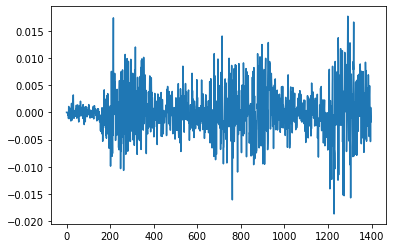

In [657]:
# Train set
l_ARMA = np.log(ARMA_Train)
r_ARMA = l_ARMA[1:]-l_ARMA[:-1]

plt.plot(r_ARMA)

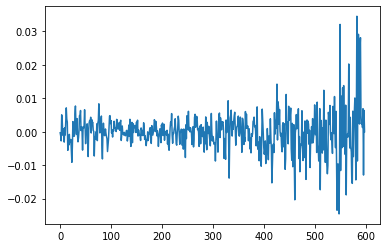

In [658]:
# Test set
l_ARMA = np.log(ARMA_Test)
r_ARMAT = l_ARMA[1:]-l_ARMA[:-1]

plt.plot(r_ARMAT)

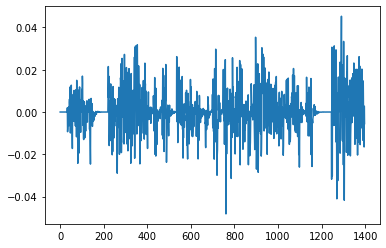

In [659]:
# Train set
l_TF = np.log(TF_Train)
r_TF = l_TF[1:]-l_TF[:-1]

plt.plot(r_TF)

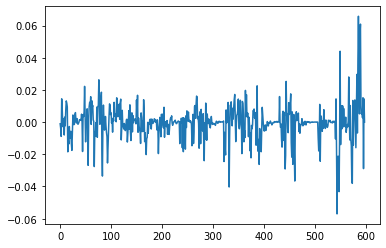

In [660]:
#Test Set
l_TFT = np.log(TF_Test)
r_TFT = l_TFT[1:]-l_TFT[:-1]

plt.plot(r_TFT)

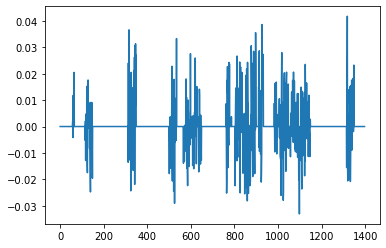

In [661]:
l_MR = np.log(MR_Train)
r_MR = l_MR[1:]-l_MR[:-1]

plt.plot(r_MR)

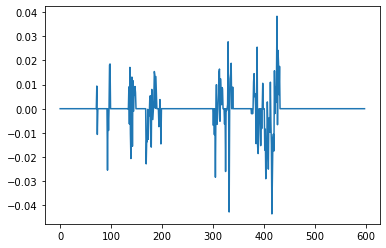

In [662]:
l_MRT = np.log(MR_Test)
r_MRT = l_MRT[1:]-l_MRT[:-1]

plt.plot(r_MRT)

##### mean returns


In [663]:
r_ARMA.mean()

0.00010719470198211297

In [664]:
r_TF.mean()

0.00029360529416773136

In [665]:
r_MR.mean()

0.0004105325264789229

In [666]:
r_ARMAT.mean()

-0.00019776906685173211

In [667]:
r_TFT.mean()

-0.0005842609055977351

In [668]:
r_MRT.mean()

-0.00023247233010978692

In [669]:
test.mean()

-0.053636180696628045

## Performance Indicators
Compute 3 representative performance indicators, Sharpe ratio and two alternatives introduced during lectures, to evaluate the trading strategies. If appropriate, for each of them 
provide two independent measures: within the training set and within the test set.

#### Indicator:

In [670]:
def SR(r):
    # Input: r- the vector of return of strategy over the period
    # Output: SR
    mean = r.mean()
    vol = r.std()
    SR = mean/vol
    return SR

def VaR(r):
    # Input: r- the vector of return of strategy over the period
    # Output: ASR - Adjustment Sharp Ratio
    Var=np.quantile(r,0.05)
    return -Var


def MDD(value):
    peak = value.max()
    a=value.tolist()
    day=a.index(peak)
    low=value[day:].min()
    return (peak-low)/peak


def CR(r,value):
    # Input: r- the vector of return of strategy over the period
    # Output: Burke Ratio
    mu = r.mean()
    Max_DD = MDD(value)
    return mu/Max_DD
    


In [671]:
MDD(np.array(TF_Train))

0.02498819150255131

#### Train

In [672]:
print('The Sharp Ratio of TF1 in training set is ', SR(r_TF), '\n')
print('The CR of TF1 in training set is ', CR(r_TF, TF_Train), '\n')
print('The VaR of TF1 in training set is ', VaR(r_TF), '\n\n')

print('The Sharp Ratio of ARMA in training set is ', SR(r_ARMA)*math.sqrt(252), '\n')
print('The CR of ARMA in training set is ', CR(r_ARMA,ARMA_Train), '\n')
print('The VaR of ARMA in training set is ', VaR(r_ARMA), '\n\n')

print('The Sharp Ratio of MR in training set is ', SR(r_MR)*math.sqrt(252), '\n')
print('The CR of MR in training set is ', CR(r_MR,np.array(MR_Train)), '\n')
print('The VaR of MR in training set is ', VaR(r_MR), '\n')


The Sharp Ratio of TF1 in training set is  0.03012743458033796 

The CR of TF1 in training set is  0.011749761647926946 

The VaR of TF1 in training set is  0.016053058358957983 


The Sharp Ratio of ARMA in training set is  0.4200030105709168 

The CR of ARMA in training set is  0.013104627553570322 

The VaR of ARMA in training set is  0.0064377045400161315 


The Sharp Ratio of MR in training set is  0.8490538740886667 

The CR of MR in training set is  inf 

The VaR of MR in training set is  0.012490302485840842 



<ipython-input-670-4be930d3fbe1>:29: RuntimeWarning: divide by zero encountered in double_scalars
  return mu/Max_DD


In [673]:
4.7/0.67

7.014925373134329

#### Test Set


In [674]:
print('The Sharp Ratio of TF1 in test set is ', SR(r_TFT), '\n')
print('The CR of TF1 in test set is ', CR(r_TFT,TF_Test), '\n')
print('The VaR of TF1 in test set is ', VaR(r_TFT), '\n\n')

print('The Sharp Ratio of ARMA in test set is ', SR(r_ARMAT), '\n')
print('The CR of ARMA in test set is ', CR(r_ARMAT,ARMA_Test), '\n')
print('The VaR of ARMA in test set is ', VaR(r_ARMAT), '\n\n')

print('The Sharp Ratio of TF2 in test set is ', SR(r_MRT), '\n')
print('The CR of TF2 in test set is ', CR(r_MRT,MR_Test), '\n')
print('The VaR of TF2 in test set is ', VaR(r_MRT), '\n')


The Sharp Ratio of TF1 in test set is  -0.05331662699039398 

The CR of TF1 in test set is  -0.0010837327843156515 

The VaR of TF1 in test set is  0.01839127245091596 


The Sharp Ratio of ARMA in test set is  -0.034589753493890596 

The CR of ARMA in test set is  -0.0006580757020198424 

The VaR of ARMA in test set is  0.008778194825385378 


The Sharp Ratio of TF2 in test set is  -0.03672932847525618 

The CR of TF2 in test set is  -0.000832264163565439 

The VaR of TF2 in test set is  0.010249575085921947 



In [675]:
SR(r_MR)*np.sqrt(252)

0.8490538740886667

## Statistical Test
For the hypotheses that the strategies have a non-zero Sharpe ratio, use a statistical test
covered in the lectures to control for Family Wise Error Rate (FWER) at a confidence
level of 5%. Explain why this is a useful thing to do; you can use a simple example to
illustrate you answer.

In [676]:
a_SR = 2
K = a_SR*np.sqrt(252)
t_st_F = a_SR*np.sqrt(1400/252)
p_s_TF = stats.t.sf(np.abs(t_st_F),252 * 5)*2
p_s_TF

2.698514067582487e-06

In [677]:
t_st_F

4.714045207910317

In [678]:
# The annualized SR in the train set:

#TF:
    # we use annualized in above analysis. 
ASR_TF=SR(r_TF)*np.sqrt(252)
print('the annualized SR of TF strategy is ', SR(r_TF)*np.sqrt(252))

print('There are 1400 point in the training set, approximately 5 year')

t_st_TF = ASR_TF * math.sqrt(5)
print('The t statistic is: ', t_st_TF )

p_s_TF = stats.t.sf(np.abs(t_st_TF),252 * 5)*2
print('corresponding p value is', p_s_TF )


    #in test set, there are 600 days, approximately 2 years. So about 2*252=500 days will be taken accout.






the annualized SR of TF strategy is  0.4782581972396511
There are 1400 point in the training set, approximately 5 year
The t statistic is:  1.0694178398243621
corresponding p value is 0.28508625608565485


In [679]:
r_MR.std(),r_MR.mean(), r_MR.mean()/r_MR.std()*np.sqrt(252)

(0.007675604599287235, 0.0004105325264789229, 0.8490538740886667)

In [680]:
#MR:
    # we use annualized in above analysis. 
ASR_MR=SR(r_MR)*np.sqrt(252)
print('the annualized SR of MR strategy is ', ASR_MR)

print('There are 1400 point in the training set, approximately 5 year')

t_st_MR = ASR_MR * math.sqrt(1400/252)
print('The t statistic is: ', t_st_MR )

p_s_MR = stats.t.sf(np.abs(t_st_MR),1400)*2
print('corresponding p value is', p_s_MR )

the annualized SR of MR strategy is  0.8490538740886667
There are 1400 point in the training set, approximately 5 year
The t statistic is:  2.0012391732026846
corresponding p value is 0.045559344363367955


In [681]:
1-(1-p_s_MR)**2

0.08904303486791598